In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def Postproc_data(filepath, I, J, K):
    # Initialize empty arrays for A and B
    data_dict = {}

    with open(filepath, 'r') as file:
        for line in file:
            # Assuming data is space-separated, modify as per your file format
            data = line.strip().split()
            # Extracting i, j, k indices
            i, j, k = int(data[0]), int(data[1]), int(data[2])
            # Extracting A[i,j,k] and B[i,j,k] values
            U, V, W, P, T = float(data[3]), float(data[4]), float(data[5]), float(data[6]), float(data[7])
            # Store values in data dictionary
            data_dict[(i, j, k)] = (U, V, W, P, T)

    # Create arrays A and B
    u2 = [[[0.0 for _ in range(K + 1)] for _ in range(J + 1)] for _ in range(I + 1)]
    v2 = [[[0.0 for _ in range(K + 1)] for _ in range(J + 1)] for _ in range(I + 1)]
    w2 = [[[0.0 for _ in range(K + 1)] for _ in range(J + 1)] for _ in range(I + 1)]
    p  = [[[0.0 for _ in range(K + 1)] for _ in range(J + 1)] for _ in range(I + 1)]
    t2 = [[[0.0 for _ in range(K + 1)] for _ in range(J + 1)] for _ in range(I + 1)]

    # Populate arrays A and B with values from data dictionary
    for (i, j, k), (U, V, W, P, T) in data_dict.items():
        u2[i][j][k] = U
        v2[i][j][k] = V
        w2[i][j][k] = W
        p[i][j][k]  = P
        t2[i][j][k] = T

    return u2, v2, w2, p, t2

In [22]:
# Example usage:
file_path = 'result'  # Replace 'data.txt' with the path to your text file
I, J, K = 90, 22, 97  # Replace Nx, Ny, Nz with the actual maximum values
u2, v2, w2, p, t2 = Postproc_data(file_path, I, J, K)

In [23]:
print(u2[30][20][30], v2[30][20][30], w2[30][20][30], p[30][20][30], t2[30][20][30])

0.629791169333347 -0.00102726809376392 -1.2613520583383956e-06 1.1871206082145054 0.6215804625562233


In [24]:
u2 = np.array(u2)
v2 = np.array(v2)
w2 = np.array(w2)
p  = np.array(p)
t2 = np.array(t2)

In [28]:
u2_cen = u2[:,:,49].transpose()
v2_cen = v2[:,:,49].transpose()
w2_cen = w2[:,:,49].transpose()
p2_cen = p[:,:,49].transpose()
t2_cen = t2[:,:,49].transpose()

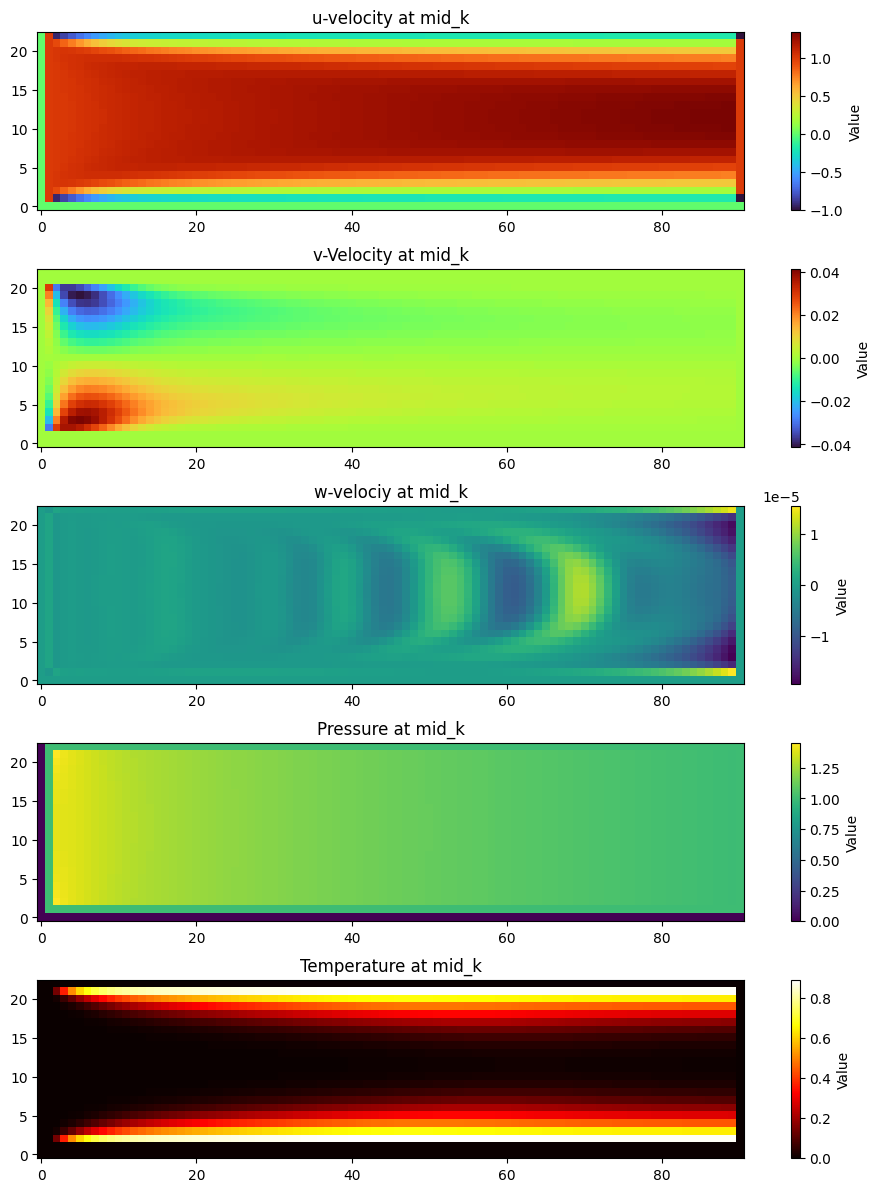

In [74]:
plt.figure(figsize=(10, 12))

plt.subplot(5, 1, 1)
plt.imshow(u2_cen, cmap='turbo', origin='lower')
plt.title('u-velocity at mid_k')
plt.colorbar(label='Value')

plt.subplot(5, 1, 2)
plt.imshow(v2_cen, cmap='turbo', origin='lower')
plt.title('v-Velocity at mid_k')
plt.colorbar(label='Value')

plt.subplot(5, 1, 3)
plt.imshow(w2_cen, cmap='viridis', origin='lower')
plt.title('w-velociy at mid_k')
plt.colorbar(label='Value')

plt.subplot(5, 1, 4)
plt.imshow(p2_cen, cmap='viridis', origin='lower')
plt.title('Pressure at mid_k')
plt.colorbar(label='Value')

plt.subplot(5, 1, 5)
plt.imshow(t2_cen, cmap='hot', origin='lower')
plt.title('Temperature at mid_k')
plt.colorbar(label='Value')

plt.tight_layout()
plt.show()

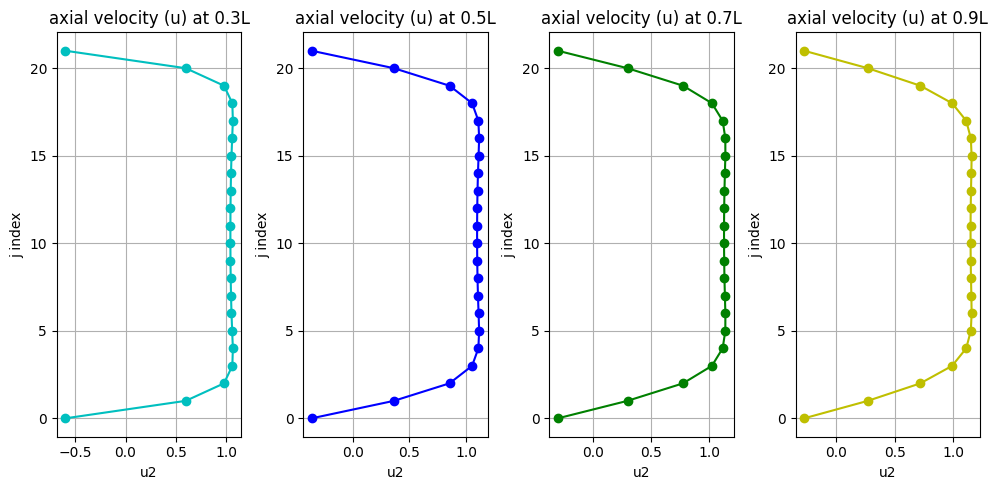

In [85]:
plt.figure(figsize=(10, 5))
jj = np.arange(0, 22)

plt.subplot(1, 4, 1)
plt.plot(u2_cen[1:,int(0.3 * J)], jj, marker='o', linestyle='-', color='c')
plt.title('axial velocity (u) at 0.3L')
plt.xlabel('u2')
plt.ylabel('j index')
plt.grid(True)

plt.subplot(1, 4, 2)
plt.plot(u2_cen[1:,int(0.5 * J)], jj, marker='o', linestyle='-', color='b')
plt.title('axial velocity (u) at 0.5L')
plt.xlabel('u2')
plt.ylabel('j index')
plt.grid(True)

plt.subplot(1, 4, 3)
plt.plot(u2_cen[1:,int(0.7 * J)], jj, marker='o', linestyle='-', color='g')
plt.title('axial velocity (u) at 0.7L')
plt.xlabel('u2')
plt.ylabel('j index')
plt.grid(True)

plt.subplot(1, 4, 4)
plt.plot(u2_cen[1:,int(0.9 * J)], jj, marker='o', linestyle='-', color='y')
plt.title('axial velocity (u) at 0.9L')
plt.xlabel('u2')
plt.ylabel('j index')
plt.grid(True)

plt.tight_layout()
plt.show()

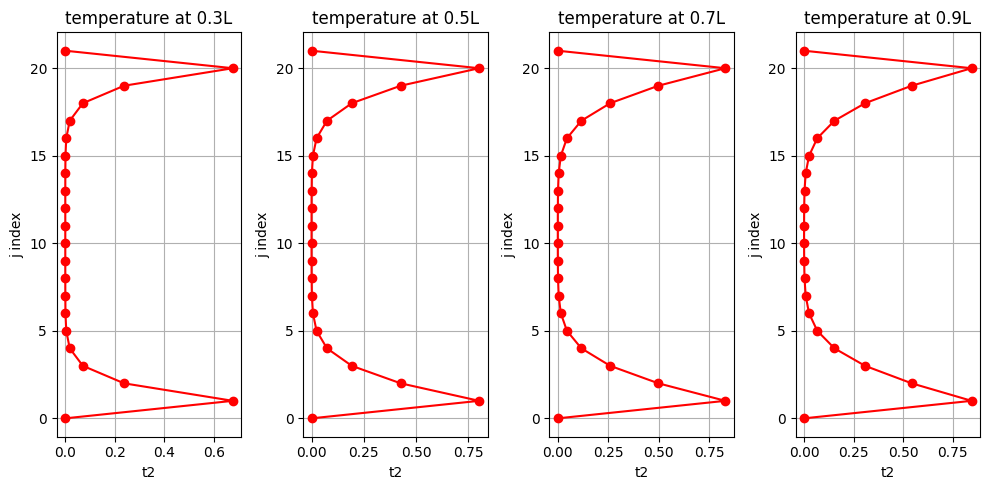

In [82]:
plt.figure(figsize=(10, 5))
jj = np.arange(0, 22)

plt.subplot(1, 4, 1)
plt.plot(t2_cen[1:,int(0.3 * J)], jj, marker='o', linestyle='-',color='r')
plt.title('temperature at 0.3L')
plt.xlabel('t2')
plt.ylabel('j index')
plt.grid(True)

plt.subplot(1, 4, 2)
plt.plot(t2_cen[1:,int(0.5 * J)], jj, marker='o', linestyle='-', color='r')
plt.title('temperature at 0.5L')
plt.xlabel('t2')
plt.ylabel('j index')
plt.grid(True)

plt.subplot(1, 4, 3)
plt.plot(t2_cen[1:,int(0.7 * J)], jj, marker='o', linestyle='-', color='r')
plt.title('temperature at 0.7L')
plt.xlabel('t2')
plt.ylabel('j index')
plt.grid(True)

plt.subplot(1, 4, 4)
plt.plot(t2_cen[1:,int(0.9 * J)], jj, marker='o', linestyle='-', color='r')
plt.title('temperature at 0.9L')
plt.xlabel('t2')
plt.ylabel('j index')
plt.grid(True)

plt.tight_layout()
plt.show()